# Categorising the IMDB rating into 3 classes Hit,Avg,Flop
Here I have dataset named movie_metadata in which the target variable is IMDB score and other variables that decide the IMDB score. Instead of just IMDB score,With the help of other parameters I want to predict whether a movie is Hit,Avg or Flop.

imdb_score	Classify
1-3	    Flop Movie
3-6	    Average Movie
6-10	Hit Movie

In [ ]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Describing Data
The dataset contains 28 variables for 5043 movies, spanning across
100 years in 66 countries. There are 2399 unique director names, and
thousands of actors/actresses. “imdb_score” is
the response variable while the other 27 variables are possible predictors.

In [ ]:
path= r"C:\Users\suraj tripathi\Desktop\movie_metadata.csv"

In [ ]:
df=pd.read_csv(path)

In [ ]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [ ]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
object_columns = df.select_dtypes(include="object").columns
object_columns

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')

In [ ]:
#Categorising the target varible
bins = [ 1, 3, 6, 10]
labels = ['FLOP', 'AVG', 'HIT']
df['imdb_binned'] = pd.cut(df['imdb_score'], bins=bins, labels=labels)

In [ ]:
df['imdb_binned']

0       HIT
1       HIT
2       HIT
3       HIT
4       HIT
       ... 
5038    HIT
5039    HIT
5040    HIT
5041    HIT
5042    HIT
Name: imdb_binned, Length: 5043, dtype: category
Categories (3, object): ['FLOP' < 'AVG' < 'HIT']

Text(0.5, 1.0, 'Categorization of Movies')

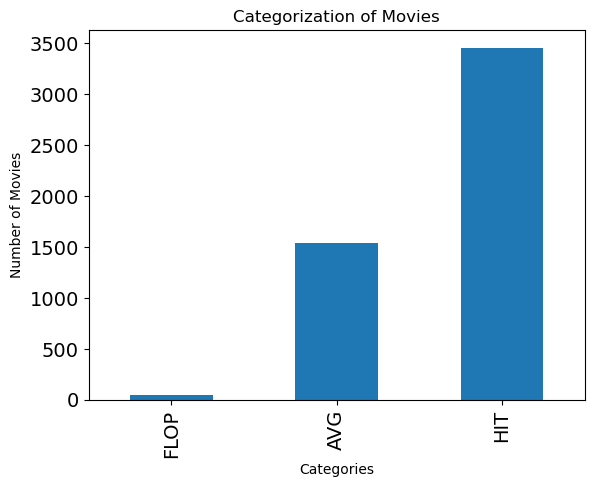

In [ ]:

#Barplot of imbd_binned column
df.groupby(['imdb_binned']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Number of Movies')
plt.title('Categorization of Movies')

In [ ]:
#Checking the new column
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_binned
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,HIT
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,HIT
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,HIT
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,HIT
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,HIT


In [ ]:
#Shape of the dataset
df.shape

(5043, 29)

# Handling the Missing values
Every datset have some missing values, lets find out in which cloumns they are?

In [ ]:
#Total null values present in each column
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
imdb_binned                    0
dtype: int64

In [ ]:
#Droping the samples that have missing values
df.dropna(inplace=True)

In [ ]:
df.shape

(3756, 29)

In [ ]:
#Describing the categorical data
df.describe(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,3756,3756,3756,3756,3756,3756,3756,3756,3756,3756,3756,3756
unique,2,1659,2188,745,1428,3655,2587,3656,3656,34,45,12
top,Color,Steven Spielberg,Morgan Freeman,Comedy|Drama|Romance,Robert De Niro,Home,Steve Coogan,alien friendship|alien invasion|australia|flyi...,http://www.imdb.com/title/tt2224026/?ref_=fn_t...,English,USA,R
freq,3632,25,20,147,42,3,8,3,3,3598,2987,1700


In [ ]:
#Dropping 2 columns
df.drop(columns=['movie_title','movie_imdb_link'],inplace=True)

# Label Encoding
All the categorical columns and the columns with text data are
being Label Encodeded in this step.

In [ ]:
#Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['color', 'director_name', 'actor_2_name',
        'genres', 'actor_1_name',
        'actor_3_name',
        'plot_keywords',
        'language', 'country', 'content_rating',
       'title_year', 'aspect_ratio']
df[cat_list]=df[cat_list].apply(lambda x:le.fit_transform(x))

In [ ]:
df[cat_list]

,color,director_name,actor_2_name,genres,actor_1_name,actor_3_name,plot_keywords,language,country,content_rating,title_year,aspect_ratio
0,1,620,1002,91,189,2529,1038,9,43,7,66,7
1,1,538,1592,85,687,1001,3327,9,43,7,64,12
2,1,1395,1795,107,258,2296,1625,9,42,7,72,12
3,1,251,381,243,1340,1267,2736,9,43,7,69,12
5,1,62,1837,105,323,1967,507,9,43,7,69,12
...,...,...,...,...,...,...,...,...,...,...,...,...
5026,1,1167,300,687,868,656,3474,11,13,9,61,12
5027,1,612,1522,635,450,1771,212,26,22,5,57,8
5033,1,1425,518,708,1233,368,2127,9,43,7,61,8
5035,1,1343,1655,168,198,490,931,30,43,9,49,2


<AxesSubplot:>

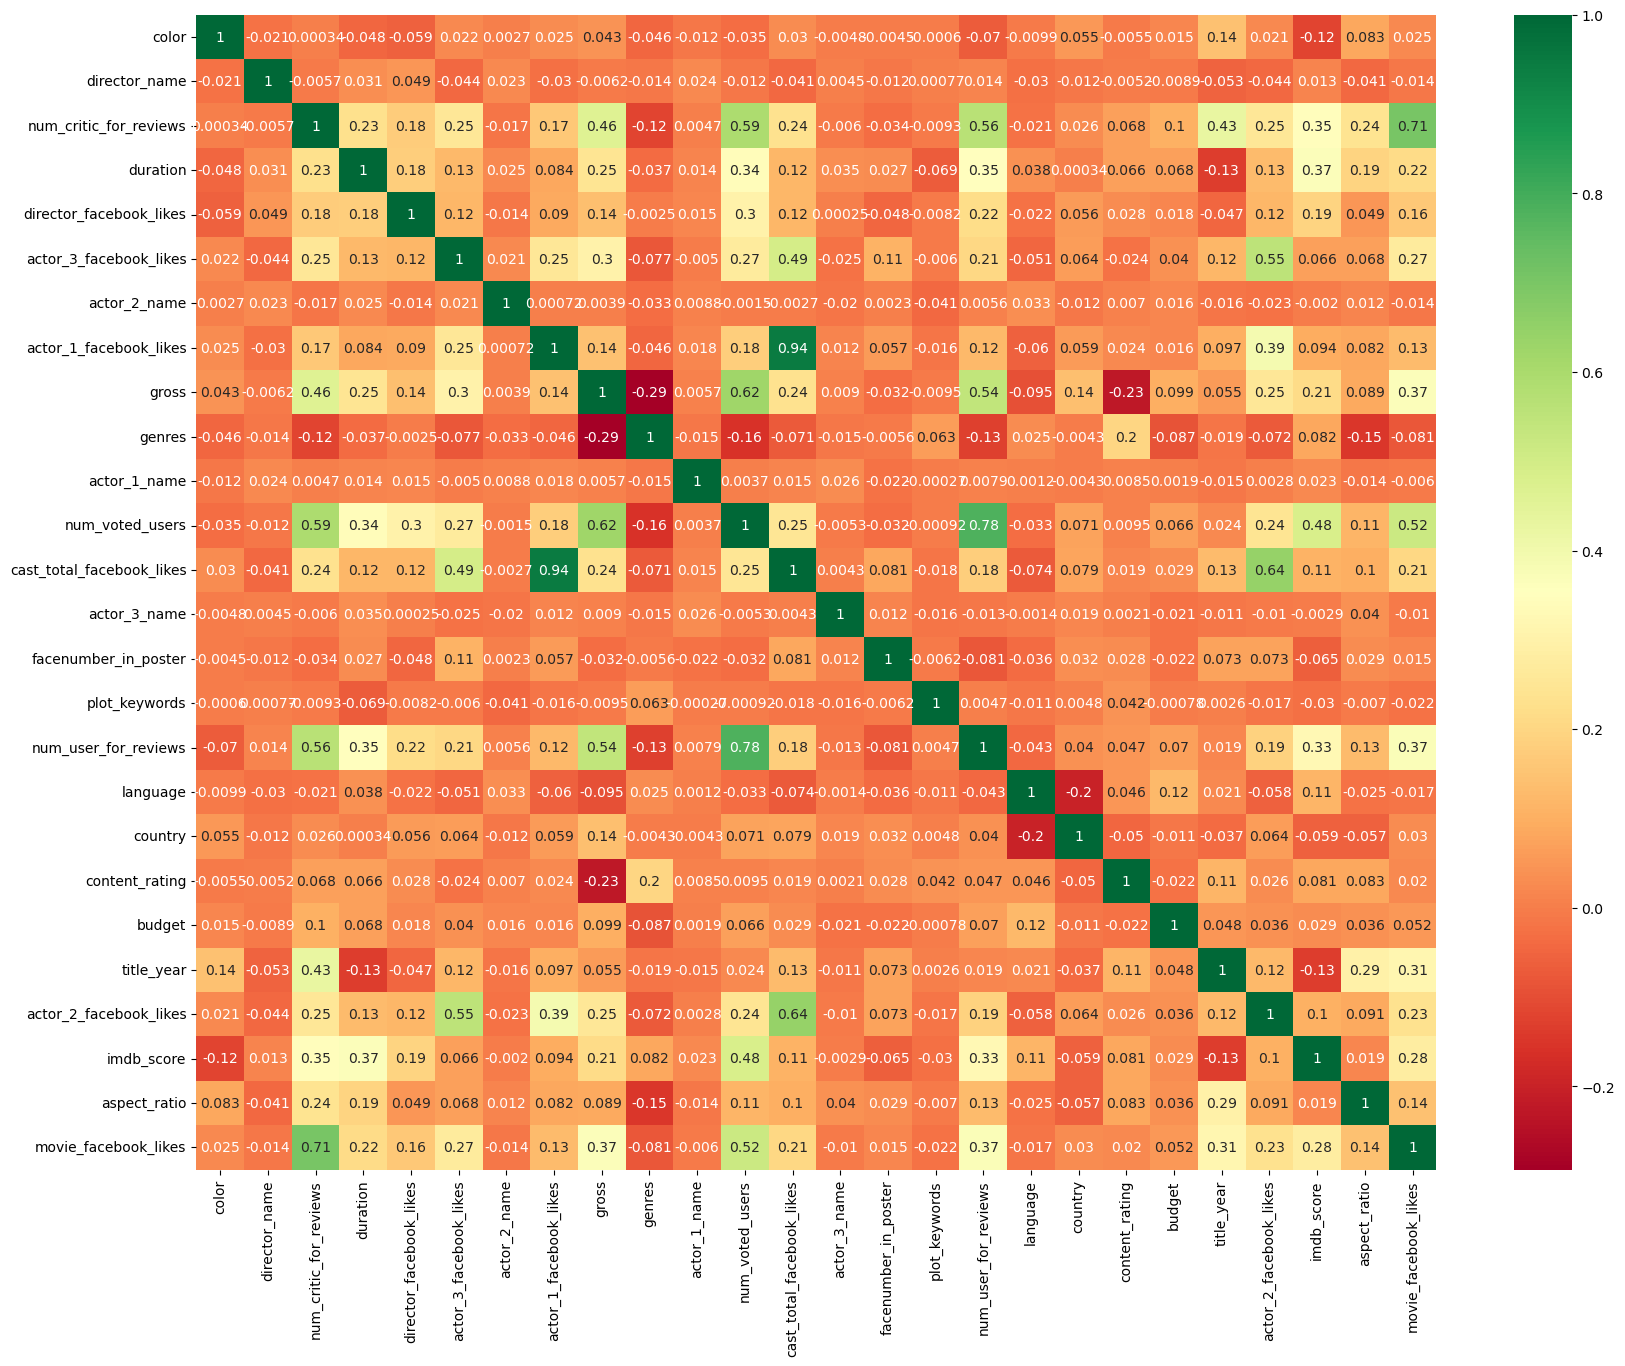

In [ ]:
#Finding Correlation between variables
corr = df.corr()

plt.subplots(figsize=(20,15))
sns.heatmap(corr,  cmap='RdYlGn',annot=True)

In [ ]:
#Removing few columns due to multicollinearity
df.drop(columns=['cast_total_facebook_likes','num_critic_for_reviews'],inplace=True)

In [ ]:

#Removing the column "imdb_score" since we have "imdb_binned"
df.drop(columns=['imdb_score'],inplace=True)

# CLASSIFICATION MODEL BUILDING

Splitting the data into X and y where X contains Indepentent variables and y contain Target/Dependent variable.


In [ ]:
#Independent Variables
X = df.iloc[:, 0:23].values
#Dependent/Target Variable
y = df.iloc[:, 23].values


# Train Test Split
We need data not only to train our model but also to test our model. So splitting the dataset into 70:30 (Train:Test) ratio.We have a predefined a function
in Sklearn library called test_train_split, lets use that.

In [ ]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,stratify = y)
print(X_train.shape)
print(y_train.shape)

(2629, 23)
(2629,)


# Scaling
Few variables will be in the range of Millions and some in Tens,
lets bring all of them into same scale

In [ ]:

#Scaling the dependent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#  Random Forest
Random forests is an ensemble learning method for classification that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) of the individual trees

n_estimators is a parameter that specify number of trees in the forest.

criterion is to specify what function to measure the quality of a split. “entropy” is for the information gain.

In [ ]:
#Training the Random Forest Classifer on Train data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the target variable
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array(['HIT', 'AVG', 'HIT', ..., 'AVG', 'HIT', 'AVG'], dtype=object)

# Confusion Matrix
Confusion matrix gives a clear view of ground truth and prediction.

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[185,   0, 150],
       [  4,   0,   4],
       [ 63,   0, 721]], dtype=int64)

# Classification Report

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         AVG       0.73      0.55      0.63       335
        FLOP       0.00      0.00      0.00         8
         HIT       0.82      0.92      0.87       784

    accuracy                           0.80      1127
   macro avg       0.52      0.49      0.50      1127
weighted avg       0.79      0.80      0.79      1127



C:\Users\suraj tripathi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suraj tripathi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suraj tripathi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
